# Analysis of Psychological and Social Factors Affecting Student Performance

<p style="text-align: center;">
<img src="../../../images/factor.jfif" alt="Demographics and Background" style="width: 800px; height: 500px;">
</p>

## Introduction
In this section, we will explore the influence of various psychological and social factors on student performance. These factors include:

- **Experienced Bullying**
- **Peer Pressure**
- **Comfort in School Environment**
- **Confidence in Academic Ability**
- **Parental Involvement** (e.g., help with homework, encouragement for higher education)
- **Access to Counseling**
- **Stress About Schoolwork**


In [118]:
import pandas as pd
from sqlalchemy import create_engine, inspect,text
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [120]:
# Database path in the schema folder
db_path = '../../../Schema/student_database.db'

engine = create_engine(f'sqlite:///{db_path}')

with engine.connect() as conn:
    print("Connected to the database.")
    
    inspector = inspect(engine)
    tables = inspector.get_table_names()
    print("Tables in the database:", tables)

Connected to the database.
Tables in the database: ['student_performance']


In [122]:
query = "SELECT * FROM student_performance;"
df = pd.read_sql(query, con=engine)
df.shape

(100, 47)

## Percentage of Students Considering Dropping Out and Reasons

In [125]:
# Calculating the percentage of students considering dropping out
dropout_counts = df['Considered Dropping Out'].value_counts(normalize=True) * 100

dropout_categories = ['Yes', 'Often', 'Sometimes']

dropout_counts = dropout_counts.reindex(dropout_categories, fill_value=0)

dropout_percentage = dropout_counts.sum()


print(f"Percentage of students considering dropping out: {dropout_percentage:.2f}%")

dropout_reasons = df[df['Considered Dropping Out'].isin(dropout_categories)]['Reason To Dropout'].value_counts()
print("Reasons for considering dropping out:")
dropout_reasons

Percentage of students considering dropping out: 23.00%
Reasons for considering dropping out:


Reason To Dropout
Others                        10
Lack of intrest in studies     8
Poor academics performance     2
Financial difficulties         2
Social                         1
Name: count, dtype: int64

`23%`of students have considered dropping out, with the primary reasons being lack of interest in studies (8 cases), followed by poor academic performance and financial difficulties (2 cases each), while social reasons and others make up the remaining cases.

## Relation of Dropout Consideration to Performance and Engagement

In [129]:
# data for students who have considered dropping out ("Yes," "Often," "Sometimes")
dropout_categories = ['Yes', 'Often', 'Sometimes']
dropout_filtered = df[df['Considered Dropping Out'].isin(dropout_categories)]

performance_value_counts = dropout_filtered['Last Exam Performance'].value_counts()

# Display the value counts
print("Performance categories for students who considered dropping out:")
print(performance_value_counts)

Performance categories for students who considered dropping out:
Last Exam Performance
60% - 69%     10
70% - 100%     9
40% - 59%      3
Below 40%      1
Name: count, dtype: int64


**Insight:**
From the performance categories of students who considered dropping out, we can observe that:

`10` students (the largest group) have a performance score between `60% - 69%`.
`9` students have high performance, scoring between `70% - 100%`, suggesting that even high-performing students consider dropping out.
`3` students have a performance score between `40% - 59%`, and only `1 student scored below 40%`.


**This suggests that dropout consideration is not limited to poor performance, as students across different performance ranges, including high-performing ones, have also considered dropping out. This indicates that factors beyond just academic performance (like social or personal reasons) may play a significant role in dropout consideration.**

## Impact of Bullying on Academic Performance

In [81]:
# Analyzing the impact of bullying on academic performance
bullying_performance = df.groupby(['Experienced Bullying', 'Last Exam Performance']).size().unstack()
bullying_demographics = df.groupby(['Gender', 'Family Financial Status', 'Experienced Bullying']).size().unstack()

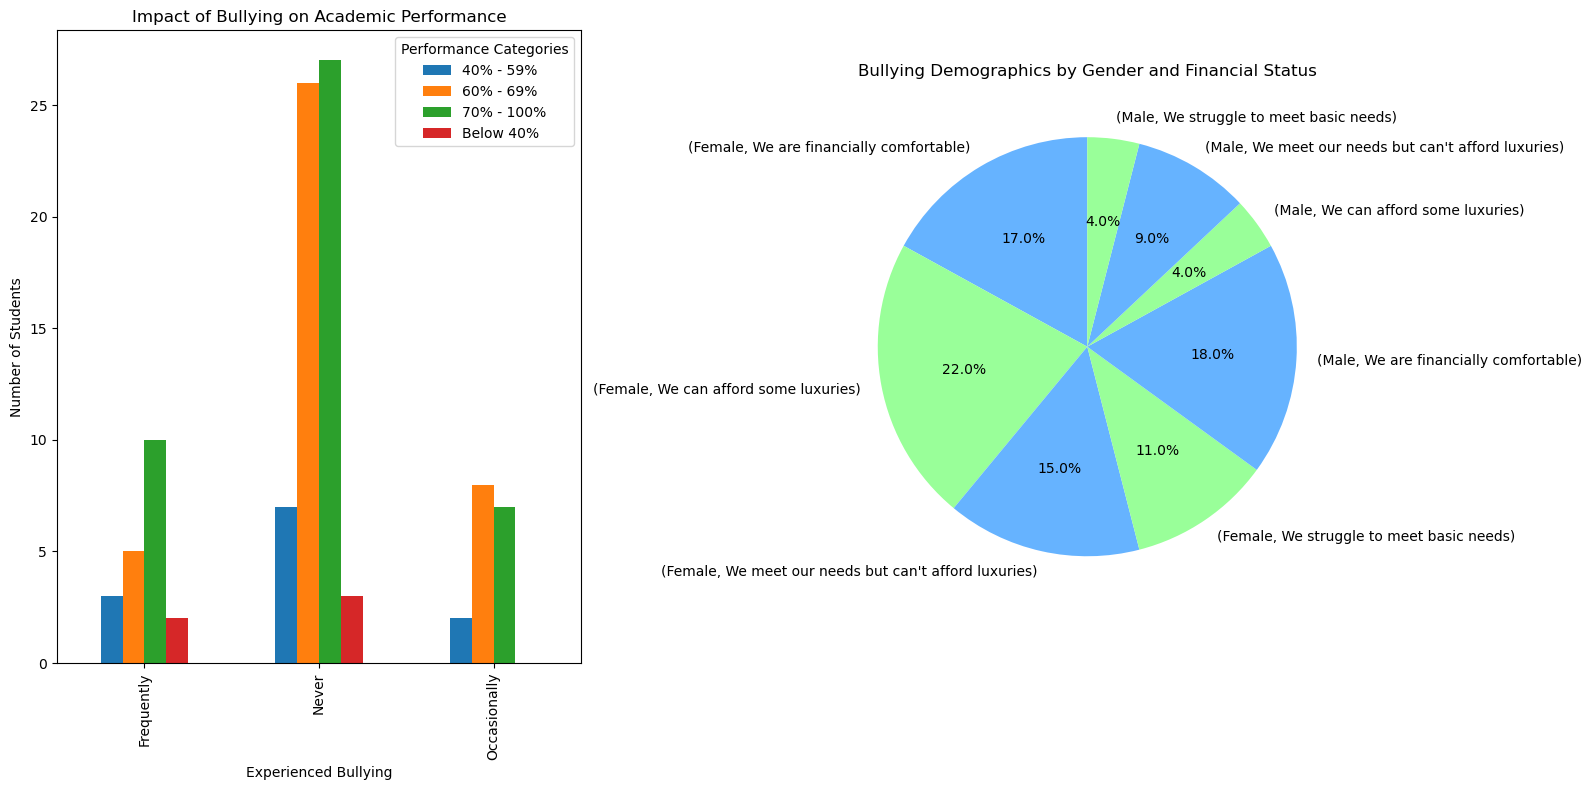

In [132]:
import matplotlib.pyplot as plt

# Set up a grid for plotting two charts side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# First chart
bullying_performance = df.groupby(['Experienced Bullying', 'Last Exam Performance']).size().unstack()
bullying_performance.plot(kind='bar', stacked=False, ax=axes[0], color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
axes[0].set_title('Impact of Bullying on Academic Performance')
axes[0].set_xlabel('Experienced Bullying')
axes[0].set_ylabel('Number of Students')
axes[0].legend(title='Performance Categories')

# Second chart
bullying_demographics = df.groupby(['Gender', 'Family Financial Status', 'Experienced Bullying']).size().unstack()

bullying_demographics.sum(axis=1).plot(kind='pie', autopct='%1.1f%%', startangle=90, ax=axes[1], colors=['#66b3ff', '#99ff99'])
axes[1].set_ylabel('')
axes[1].set_title('Bullying Demographics by Gender and Financial Status')

# Display the plots
plt.tight_layout()
image_path = '../../../docs/go.png'  
plt.savefig(image_path)
plt.show()


### Insight on the Impact of Bullying on Academic Performance

Based on the data:

- **Students who experience bullying frequently** tend to have the following Last Exam Performance scores:
  - **40% - 59%**: 3 students
  - **60% - 69%**: 5 students
  - **70% - 100%**: 10 students
  - **Below 40%**: 2 students

- **Students who have never experienced bullying** have significantly better performance scores:
  - **40% - 59%**: 7 students
  - **60% - 69%**: 26 students
  - **70% - 100%**: 27 students
  - **Below 40%**: 3 students

- **Occasionally bullied students** show mixed performance:
  - **40% - 59%**: 2 students
  - **60% - 69%**: 8 students
  - **70% - 100%**: 7 students

**Overall Insight**: Students who experience bullying frequently tend to have lower performance scores compared to those who have never been bullied. This suggests that experiencing bullying can have a detrimental effect on academic performance, as reflected by a higher proportion of students scoring in lower performance brackets among those frequently bullied.

---

### Insight on Bullying Demographics by Gender and Financial Status

From the data on bullying demographics:

#### Female Students:
- **Financially Comfortable**:
  - Frequently bullied: 2
  - Never bullied: 14
  - Occasionally bullied: 1

- **Can Afford Some Luxuries**:
  - Frequently bullied: 3
  - Never bullied: 15
  - Occasionally bullied: 4

- **Meet Needs but Can't Afford Luxuries**:
  - Frequently bullied: 5
  - Never bullied: 8
  - Occasionally bullied: 2

- **Struggling to Meet Basic Needs**:
  - Frequently bullied: 4
  - Never bullied: 6
  - Occasionally bullied: 1

#### Male Students:
- **Financially Comfortable**:
  - Frequently bullied: 1
  - Never bullied: 10
  - Occasionally bullied: 7

- **Can Afford Some Luxuries**:
  - Frequently bullied: 1
  - Never bullied: 3
  - Occasionally bullied: Nil

- **Meet Needs but Can't Afford Luxuries**:
  - Frequently bullied: 2
  - Never bullied: 5
  - Occasionally bullied: 2

- **Struggling to Meet Basic Needs**:
  - Frequently bullied: 2
  - Never bullied: 2
  - Occasionally bullied: Nil

**Overall Insight**: 
- **Female students** who are frequently bullied are more likely to come from families that struggle to meet basic needs compared to other financial statuses. Conversely, **male students** show a tendency to experience bullying less frequently than females across all financial statuses, especially those who are financially comfortable.
- Both genders show that those who experience bullying less frequently tend to have higher counts in the "Never" category, indicating that financial stability might play a role in the prevalence of bullying experiences.

This suggests that financial status may influence the likelihood of experiencing bullying, with students from lower financial backgrounds being more vulnerable to bullying incidents.


## Comfort Level in the School Environment Affecting Academic Performance?

In [96]:
# Analyze how comfort level relates to performance
comfort_performance = df.groupby('Comfort in School Environment')['Last Exam Performance'].value_counts()
print("Impact of comfort level on academic performance:")
comfort_performance

Impact of comfort level on academic performance:


Comfort in School Environment  Last Exam Performance
Comfortable                    70% - 100%               22
                               60% - 69%                11
                               40% - 59%                 6
                               Below 40%                 4
Somewhat Comfortable           70% - 100%               19
                               60% - 69%                18
                               40% - 59%                 6
Uncomfortable                  60% - 69%                10
                               70% - 100%                3
                               Below 40%                 1
Name: count, dtype: int64

<Figure size 1000x600 with 0 Axes>

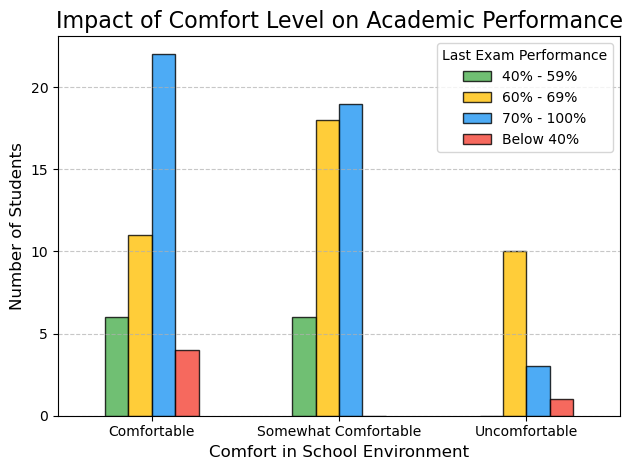

In [134]:
comfort_performance = df.groupby('Comfort in School Environment')['Last Exam Performance'].value_counts().unstack(fill_value=0)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
comfort_performance.plot(kind='bar', stacked=False, color=['#4CAF50', '#FFC107', '#2196F3', '#F44336'], edgecolor='black', alpha=0.8)

plt.title('Impact of Comfort Level on Academic Performance', fontsize=16)
plt.xlabel('Comfort in School Environment', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Last Exam Performance', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
image_path = '../../../docs/4.png'  
plt.savefig(image_path)
plt.show()

### Insight on the Impact of Comfort Level on Academic Performance

Based on the data:

- **Comfortable Students**:
  - **70% - 100%**: 22 students
  - **60% - 69%**: 11 students
  - **40% - 59%**: 6 students
  - **Below 40%**: 4 students

- **Somewhat Comfortable Students**:
  - **70% - 100%**: 19 students
  - **60% - 69%**: 18 students
  - **40% - 59%**: 6 students

- **Uncomfortable Students**:
  - **60% - 69%**: 10 students
  - **70% - 100%**: 3 students
  - **Below 40%**: 1 student

**Overall Insight**: 
- Students who feel **comfortable** in their school environment tend to have the highest performance scores, particularly in the **70% - 100%** category. 
- Those who are **somewhat comfortable** also perform well, but there is a noticeable drop in performance among **uncomfortable students**, who are significantly less likely to score in the higher brackets.
- This suggests that a positive and comfortable school environment is crucial for academic success.


## Effect of Peer Pressure on Student Performance

In [108]:
# Analyze the effect of peer pressure on performance
peer_pressure_performance = df.groupby('Peer Pressure')['Last Exam Performance'].value_counts()
print("Effect of peer pressure on academic performance:")
peer_pressure_performance

Effect of peer pressure on academic performance:


Peer Pressure  Last Exam Performance
Frequently     70% - 100%                9
               40% - 59%                 4
               60% - 69%                 3
               Below 40%                 2
Never          60% - 69%                28
               70% - 100%               22
               40% - 59%                 5
               Below 40%                 3
Occasionally   70% - 100%               13
               60% - 69%                 8
               40% - 59%                 3
Name: count, dtype: int64

### Insight on the Effect of Peer Pressure on Academic Performance

Based on the data:

- **Students Experiencing Peer Pressure Frequently**:
  - **70% - 100%**: 9 students
  - **60% - 69%**: 3 students
  - **40% - 59%**: 4 students
  - **Below 40%**: 2 students

- **Students Not Experiencing Peer Pressure (Never)**:
  - **70% - 100%**: 22 students
  - **60% - 69%**: 28 students
  - **40% - 59%**: 5 students
  - **Below 40%**: 3 students

- **Students Experiencing Peer Pressure Occasionally**:
  - **70% - 100%**: 13 students
  - **60% - 69%**: 8 students
  - **40% - 59%**: 3 students

**Overall Insight**:
- Students who **never** experience peer pressure tend to perform better, particularly in the **70% - 100%** and **60% - 69%** categories.
- In contrast, those who **frequently** feel peer pressure show a lower performance, especially in the **70% - 100%** category.
- This indicates that peer pressure can negatively impact academic performance, with students who feel pressured achieving lower scores on average.
